In [1]:
import os   #These two are useful modules
import sys

import numpy as np #Numerical Python

In [2]:
# Let's define te directory where you are with the "get current working directory" command...
git_dir = os.getcwd()

#We can then define the main directory using the os.path.join command
main_dir = os.path.join(git_dir,"..")

#We can then define the corona directory using the os.path.join command
corona_dir = os.path.join(main_dir,"COVID-19")

#We can then define the data directory using the os.path.join command
data_dir = os.path.join(corona_dir,"dati-andamento-nazionale")

#..and we can define some output directory with the results
results_dir = os.path.join(git_dir,"results")

#if the directory does not exist, you can create it...
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created !" % results_dir)

In [3]:
#define the filename, in this case is in the hw-data/hw01-data directory
data_filename = "dpc-covid19-ita-andamento-nazionale.csv"

#we use the open command
data_file = open(os.path.join(data_dir, data_filename),"r")  #r means reading mode

#the readlines function gives a list with a line each
data_lines = data_file.readlines()

#you can also run a for loop, writing for the first 10 lines, the line number, the length of each line and the line content 
for li in range(len(data_lines)):
    print(li,data_lines[li])

0 data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en

1 2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,,

2 2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,,

3 2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,,

4 2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,,

5 2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,,

6 2020-02-29T18:00:00,ITA,401,105,506,543,1049,228,240,50,29,1128,18661,,

7 2020-03-01T18:00:00,ITA,639,140,779,798,1577,528,566,83,34,1694,21127,,

8 2020-03-02T18:00:00,ITA,742,166,908,927,1835,258,342,149,52,2036,23345,,

9 2020-03-03T18:00:00,ITA,1034,229,1263,1000,2263,428,466,160,79,2502,25856,,

10 2020-03-04T18:00:00,ITA,1346,295,1641,1065,2706,443,587,276,107,3089,29837,,

11 2020-03-05T18:00:00,ITA,1790,351,2141,1155,3296

In [4]:
# We can use the first line as header containing the column names.
# IMPORTANT NOTE: you can see that the variables are kept among code cells.

header = data_lines[0]

# We can ue the split function to split a long string. 
# Here we use the comma as separator, but one can use also other characters
column_names = header.split(",")

print("header contains %d columns" % len(column_names))
print(column_names)

header contains 15 columns
['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi', 'note_it', 'note_en\n']


In [5]:
# Now we can create a dictionary of list for each column name, and fill it. 
# We will use an index for the column (ci) and one for the rows (ri)

#create and init a dictionary of lists..
data_dict={}
for ci in range(len(column_names)):
    data_dict[column_names[ci]]=[]


#we start from 1 since we want to skip the first line containing the headers.
for ri in range(1,len(data_lines)):
    data_line = data_lines[ri].split(",")
    print("Processing row %d" % ri)
    for ci in range(len(column_names)):
        data_dict[column_names[ci]].append(data_line[ci])
          

Processing row 1
Processing row 2
Processing row 3
Processing row 4
Processing row 5
Processing row 6
Processing row 7
Processing row 8
Processing row 9
Processing row 10
Processing row 11
Processing row 12
Processing row 13
Processing row 14
Processing row 15
Processing row 16
Processing row 17
Processing row 18
Processing row 19
Processing row 20
Processing row 21
Processing row 22
Processing row 23
Processing row 24
Processing row 25
Processing row 26
Processing row 27
Processing row 28
Processing row 29
Processing row 30
Processing row 31
Processing row 32
Processing row 33
Processing row 34
Processing row 35
Processing row 36
Processing row 37
Processing row 38
Processing row 39
Processing row 40
Processing row 41


In [6]:
#print for example the numbers of people who are positive to the virus in time
print(data_dict["totale_positivi"])    

['221', '311', '385', '588', '821', '1049', '1577', '1835', '2263', '2706', '3296', '3916', '5061', '6387', '7985', '8514', '10590', '12839', '14955', '17750', '20603', '23073', '26062', '28710', '33190', '37860', '42681', '46638', '50418', '54030', '57521', '62013', '66414', '70065', '73880', '75528', '77635', '80572', '83049', '85388', '88274']


In [7]:
#makes an int days vector from the data string vector
giorno=[]
positivi=[]
for gi in range(len(data_dict["data"])):
    positivi.append(int(data_dict["totale_positivi"][gi]))
    if(int(data_dict["data"][gi][5:7])==2):
        giorno.append(int(data_dict["data"][gi][8:10])-23)
    if(int(data_dict["data"][gi][5:7])==3):
        giorno.append(int(data_dict["data"][gi][8:10])+6)
    if(int(data_dict["data"][gi][5:7])==4):
        giorno.append(int(data_dict["data"][gi][8:10])+37)
    if(int(data_dict["data"][gi][5:7])==5):
        giorno.append(int(data_dict["data"][gi][8:10])+67)
        
giorno=np.asarray(giorno)
positivi=np.asarray(positivi)
print(giorno)
print(positivi)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
[  221   311   385   588   821  1049  1577  1835  2263  2706  3296  3916
  5061  6387  7985  8514 10590 12839 14955 17750 20603 23073 26062 28710
 33190 37860 42681 46638 50418 54030 57521 62013 66414 70065 73880 75528
 77635 80572 83049 85388 88274]


In [8]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import time


#stima il numero totale di casi
n=90000

#defining the fit function
def fit_function(x, a, b, c):
    return a/(1+np.exp(-b*(x-c)))

initial_values=(n, 0.2, 28)
pars, covm = curve_fit(fit_function, giorno, positivi, initial_values)
print("i parametri sono ",pars,"\n")

x=np.linspace(0,65,140)
y=pars[0]/(1+np.exp(-pars[1]*(x-pars[2])))
res=positivi-pars[0]/(1+np.exp(-pars[1]*(giorno-pars[2])))
print("la matrice di covarianza e' \n",covm)

plt.figure(figsize=[12,12])
plt.subplot(211)
plt.plot(x,y,marker="",color="red",label='Logistic curve fit')
plt.scatter(giorno,positivi,marker="o",color="blue",label='Data')
plt.xlabel("Giorni",fontsize=18)
plt.grid()
plt.legend()
plt.title('Totale contagi',fontsize=28)
plt.tight_layout(pad=8.0)
plt.subplot(212)
plt.scatter(giorno,res,marker="o",color="blue")
plt.xlabel("Giorni",fontsize=18)
plt.grid()
plt.title('Residui',fontsize=24)

destinazione_log="/contagi_e_residui_logistic_"+time.strftime("%d-%m-%Y")+".png"
plt.savefig(results_dir + destinazione_log)
plt.show()


i parametri sono  [9.56593428e+04 1.80483720e-01 2.84570016e+01] 

la matrice di covarianza e' 
 [[ 5.16555726e+05 -1.28843780e+00  7.89563637e+01]
 [-1.28843780e+00  4.67024189e-06 -1.99715851e-04]
 [ 7.89563637e+01 -1.99715851e-04  1.36143000e-02]]


<Figure size 1200x1200 with 2 Axes>

i parametri sono  [ 1.25569725e+05 -1.01739704e+01  8.28043849e-02] 

la matrice di covarianza e' 
 [[ 1.18627763e+07  1.38086194e+03 -8.77579243e+00]
 [ 1.38086194e+03  2.14807255e-01 -1.19812006e-03]
 [-8.77579243e+00 -1.19812006e-03  7.10166775e-06]]


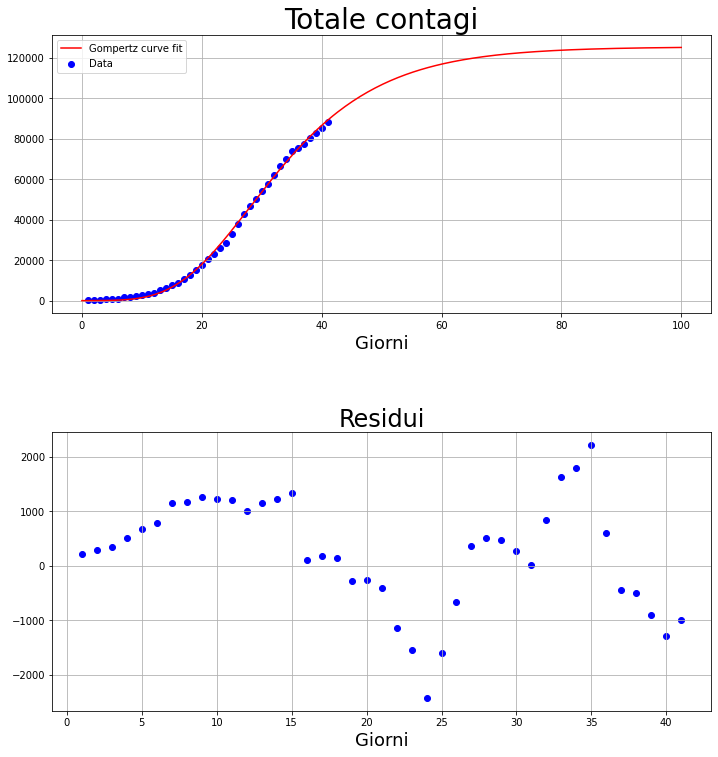

In [10]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import time

#stima il numero totale di casi
n=127000

#defining the fit function
def fit_function(x, a, b, c):
    return a*np.exp(b*np.exp(-c*x))

initial_values=(n, np.log(1/n), 0.08)
pars, covm = curve_fit(fit_function, giorno, positivi, initial_values)
print("i parametri sono ",pars,"\n")
x=np.linspace(0,100,240)

y=pars[0]*np.exp(pars[1]*np.exp(-pars[2]*x))
res=positivi-pars[0]*np.exp(pars[1]*np.exp(-pars[2]*giorno))
print("la matrice di covarianza e' \n",covm)

#chisq = (((y - fit_function(giorno, parz[0], pars[1], pars[2]))/dy)**2).sum()
#ndof = len(giorno)-2
#print(’Chisquare/ndof = %f/%d’ % (chisq, ndof))

plt.figure(figsize=[12,12])
plt.subplot(211)
plt.plot(x,y,marker="",color="red",label='Gompertz curve fit')
plt.scatter(giorno,positivi,marker="o",color="blue",label='Data')
plt.xlabel("Giorni",fontsize=18)
plt.grid()
plt.legend()
plt.title('Totale contagi',fontsize=28)
plt.tight_layout(pad=8.0)
plt.subplot(212)
plt.scatter(giorno,res,marker="o",color="blue")
plt.xlabel("Giorni",fontsize=18)
plt.grid()
plt.title('Residui',fontsize=24)

destinazione_gom="/contagi_e_residui_gompertz_"+time.strftime("%d-%m-%Y")+".png"
plt.savefig(results_dir + destinazione_gom)
plt.show()
